In [1]:
import math as m
import numpy as np
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [2]:
class Sparrow:
    def __init__(
        self, 
        u1: np.array(float),
        u2: np.array(float),
        u3: np.array(float),
        f: float
             ):
        self.u1 = u1
        self.u2 = u2
        self.u3 = u3
        self.f = f
        
class SparrowSwarm:
    def __init__(
        self,
        swarm_size: int,
        dim: int,
        m_capacity: float,
        max_loop_number: float,
        search_time: float,
        fragment: float,
        intensity_process: float,
        leader_step: float,
        reduction: float,
        recovery: float,
        levi_parameter: float,
        c1: float,
        c2: float,
        c3: float,
        min_area: float,
        func_num: int,
                 ):
        self.swarm_size = swarm_size
        self.dim = dim
        self.u_dim = dim-1
        self.m_capacity = m_capacity
        self.max_loop_number = max_loop_number
        self.search_time = search_time
        self.fragment = fragment
        self.step_integration = search_time / fragment
        self.intensity_process = intensity_process
        self.leader_step = leader_step
        self.reduction = reduction
        self.recovery = recovery
        self.levi_parameter = levi_parameter
        self.area_radius = 0
        self.c1 = c1
        self.c2 = c2
        self.c3 = c3
        self.min_area = min_area
        self.rk = 1
        
        
        self.current_iter = 0
        
        self.exact = 0
        self.function_name = ''
        self.func_num = func_num
        
        self.population = []
        self.memory = []
        self.pool = []
        
        self.vector_f1 = []
        self.vector_f2 = []
        self.vector_f3 = []
        
        self.vector_sigma1 = []
        self.vector_sigma2 = []
        self.vector_sigma3 = []
        
        self.best_all_iters = []
        
        self.best_leaders = []
        
        self.best_local = []
        self.best_local_1 = []
        self.best_local_2 = []
        self.best_local_3 = []

        self.euclid_list_1 = []
        self.euclid_list_2 = []
        self.euclid_list_3 = []
        
        self.area_new_1 = []
        self.area_new_2 = []
        self.area_new_3 = []
        
        self.best_x1 = []
        self.best_x2 = []
        self.best_x3 = []
        

        
    def init_area(self, control):
        self.area_1 = [np.array([0, 4]) for i in range(self.u_dim)]
        self.area_2 = [np.array([0, 4]) for i in range(self.u_dim)]
        self.area_3 = [np.array([0, 0.5]) for i in range(self.u_dim)]
        self.area_new_1 = deepcopy(self.area_1)
        self.area_new_2 = deepcopy(self.area_2)
        self.area_new_3 = deepcopy(self.area_3)
        self.exact = control.ExactI()

        
        
    def form_first_pop(self, control):
        self.population.clear()
        coordinate1 = np.array([3.9568912881394365, 3.2882547515470173, 2.7719562980650982, 3.5057947942170022, \
                                2.7874678810292646, 3.4464625583499666, 1.7507926581380475, 3.4169610053827686, \
                                1.912357577388394, 2.5680624601369657, 3.804359099421228, 0.4019892394829929, \
                                1.158036541578491, 1.8085119324254861, 0.8030142156912365, 1.5153142267949087, \
                                2.5415612498569313, 1.6289535442725585, 2.6874677085181338, 1.9854844635890885, \
                                0.24714033460965357, 0.5037762928490699, 2.267632744227725, 0.5107706407026505, \
                                2.3108411952538503, 1.2790361694003776, 0.2905381041550482, 1.7333341842685388, \
                                0.2670174183925371, 1.5723852604701702, 0.661526805493333, 2.296469553385176, \
                                2.917676123616526, 1.995829322507629, 0.9314250706501751, 1.437783880528904, \
                                1.9262376940507195, 0.5356249594396006, 0.6396162656656612, 1.9351098648289637, \
                                1.1162945931279704, 0.43596209613892567, 1.0356066316222896, 0.4278384166426562, \
                                1.3372104548341754, 0.2983291469921421, 0.46936802451427884, 1.2380563891613758, \
                                1.6572460800224569, 3.1030400745656888, 0.22583782023241006, 0.9344952688306141, \
                                1.761846179133867, 2.8866607517368763, 0.18988540644431517, 0.11332550018005372, \
                                0.8213700366036067, 1.1105533651680968, 0.5395144349247297, 0.6829996204632873, \
                                2.7535365682139643, 0.045429719342439, 0.665089762612579, 0.9090023954072869, \
                                0.7462847003336422, 0.20986065159856793, 0.7078845376084222, 1.450853731258794, \
                                1.3618428720719504, 0.04932086869563301, 1.9908478667428926, 0.5026328967571962, \
                                0.6450777886553298, 0.4360840185123619, 0.19798343705419819, 0.4327449113016886, \
                                0.2184493580062673, 0.28646581674947225, 0.7393468561128934, 0.01861853743437336, \
                                0.9857249735001337, 0.37129118663221095, 0.7682323733301852, 0.503640129399872, \
                                0.8851731540803772, 1.9388416769119845, 0.28163988197210454, 0.6335557630790256, \
                                1.1901537029638964, 2.6789176703981363, 0.02916083133825975, 0.8000973840909187, \
                                0.025159552459429357, 0.5312978156865115, 0.18089145883402435, 0.5713855549064667, \
                                1.428939674405224, 0.5942050341988693, 1.1890959160700023])
        
        coordinate2 = np.array([3.7768638798395524, 0.24509752275172625, 3.176570014079899, 1.6238856395201025, \
                                0.16188008682032196, 1.2545453834036675, 0.5571406680040549, 0.5176805726978513, \
                                2.2774418718637106, 2.1619946038239757, 1.8936013985092182, 1.4184955479972299, \
                                0.036833896696618185, 1.4582067619733532, 0.9982361501418138, 0.5943642923713175, \
                                2.1203552249171516, 0.813058767695123, 0.3602665665025826, 0.0015298849660367875, \
                                0.631049038020851, 0.00872912786122626, 0.7657020933094152, 1.3306106313364532, \
                                2.9812651098640903, 3.08135929515018, 0.6103190356432255, 1.7581750435846004, \
                                0.3234161735367975, 0.4600292130004231, 2.975141799043757, 1.0081587904275797, \
                                2.3843088903302476, 1.9146909604884281, 0.4565766772970934, 0.46986405372889106, \
                                1.3782316148026135, 0.9517292573454215, 0.8943699413703308, 0.6203105656647905, \
                                0.30905943865188257, 1.7877911609659023, 1.5745785859369277, 0.3325709415938749, \
                                2.9219718929497915, 0.8093724257019324, 0.40977924218221917, 1.636937943259103, \
                                1.9004336155954193, 1.1056918019428743, 0.7094257637235102, 0.30692445487160347, \
                                0.24463189195702173, 0.7874071306308643, 0.43306581970490987, 0.23805149895792788, \
                                0.5451421992291965, 0.83831155971081, 1.0519542884004167, 1.6394505392064012, \
                                0.19445851036177952, 0.8189084367006572, 1.2223261796094167, 0.6810446947281513, \
                                1.5472318695000702, 0.3451940046558005, 0.15024252183784048, 0.12935790067403385, \
                                0.06200525685855318, 0.16959963742873363, 0.6597451864255278, 0.47796628898501037, \
                                0.26991469384733435, 0.22453559001652035, 1.6814033930058423, 0.9878889435746252, \
                                1.9447548311051492, 1.857698154490977, 0.7345197967869715, 0.3101623183506932, \
                                1.5767927419940135, 0.85958786303692, 2.044791414247848, 0.3146837276454527, \
                                0.42455421190344445, 0.2925083936727979, 1.039704203424005, 0.4839399413272405, \
                                0.2957113040285819, 0.9258024395389156, 0.059041877900429585, 1.1954407018257143, \
                                0.060472762189968554, 0.6796462906879017, 0.07843729491670226, 0.48963485633884984, \
                                0.5384961225771703, 0.3295316805512376, 0.5728804387339337])
        
        coordinate3 = np.array([0.2766195263916329, 0.08651340936235262, 0.4245213370422652, 0.11017186106873443, \
                                0.2630010498643437, 0.08925859706427738, 0.2191367002505825, 0.12857612796855342, \
                                0.19277989211379978, 0.38294182026715323, 0.41033125631654405, 0.42746555832233785, \
                                0.2872718317522298, 0.11421907899742269, 0.38278841740523695, 0.08436586490329562, \
                                0.07731788486108253, 0.38670840176000393, 0.13402918150367626, 0.20181717881270436, \
                                0.3851672773724857, 0.23317751919894603, 0.4371356391655482, 0.24931406243211726, \
                                0.19860839304315503, 0.35699454499852795, 0.21013753556175677, 0.44877291416899123, \
                                0.2742747119798475, 0.41238590162927047, 0.21386203781160967, 0.40840513535990675, \
                                0.2735304337589131, 0.17016851097750843, 0.048990629319929056, 0.10490280100263796, \
                                0.26828514108914947, 0.2393048611474311, 0.1642111013580081, 0.18317079357110905, \
                                0.03308460081335082, 0.07241754991061752, 0.1421968747882738, 0.32000145425162396, \
                                0.20033452043363822, 0.11971838230953691, 0.16148717676468846, 0.32739657020205937, \
                                0.2599432952281674, 0.23834453704648403, 0.3819144780335053, 0.2528811747108641, \
                                0.4428797260044855, 0.2911900525105552, 0.1862794465254226, 0.21585956517475785, \
                                0.49781707643854967, 0.30069161343445194, 0.13248697283680033, 0.33342040179368576, \
                                0.39353302972129356, 0.2267633514411768, 0.39023757358292865, 0.10797798950977427, \
                                0.08702416590962579, 0.06833297461078634, 0.3621149591359793, 0.17920899336230212, \
                                0.2516494270122713, 0.2385578655884439, 0.3756794703494756, 0.30707316547157654, \
                                0.3433059310160469, 0.20812000092966076, 0.07478745240149107, 0.06547115212326922, \
                                0.24542381200955304, 0.10109696785760798, 0.32553160215273125, 0.40360671461112035, \
                                0.32244773058261555, 0.38509065929162045, 0.3250931102153319, 0.055108985421490016, \
                                0.4821859788616511, 0.3871345341659246, 0.42458655990244265, 0.18004882211147163, \
                                0.19230924479671774, 0.4539343617541887, 0.2000750160265165, 0.058559162558323795, \
                                0.18413756517746552, 0.2653293324779925, 0.2077958334695676, 0.3242358077127666, \
                                0.3689777850150401, 0.24177825638116754, 0.320185248673215])
        
        sparrow1 = Sparrow(coordinate1, coordinate2, coordinate3, 0)
        self.population.append(sparrow1)
        
            
        for i in range(self.swarm_size - 1):
            coordinate_1 = deepcopy(coordinate1)
            coordinate_2 = deepcopy(coordinate2)
            coordinate_3 = deepcopy(coordinate3)

            sparrow = Sparrow(coordinate_1, coordinate_2, coordinate_3, 0)
            self.population.append(sparrow)
            
            
    # best in abs x_j_best
    def find_best_all_iters(self, loop_id):
        if loop_id == 0:
            #self.best_all_iters.append(deepcopy(self.population)[1:])
            for i in range(1, self.swarm_size):
                self.best_all_iters.append(Sparrow(deepcopy(self.population[i].u1), deepcopy(self.population[i].u2),\
                                                   deepcopy(self.population[i].u3), self.population[i].f))
                
        else:
            for i in range(1, self.swarm_size):
                if self.best_all_iters[i].f > self.population[i].f:
                #if self.best_all_iters[i].f < self.population[i].f:
                    self.best_all_iters[i].f = self.population[i].f
                    self.best_all_iters[i].u1 = deepcopy(self.population[i].u1)
                    self.best_all_iters[i].u2 = deepcopy(self.population[i].u2)
                    self.best_all_iters[i].u3 = deepcopy(self.population[i].u3)
                    
                                                   
        #return max(self.best_leaders, key=lambda sparrow: sparrow.f)
    
    
    # best in pop x_best
    def find_leader(self):
        #return max(self.population, key=lambda sparrow: sparrow.f)
        return min(self.population, key=lambda sparrow: sparrow.f)
    
    
      
    def find_best_local(self, leader_index):
        self.best_local.clear()
        
        for i in range(self.swarm_size):
            if i != leader_index:
                sparrow = Sparrow(deepcopy(self.population[i].u1), deepcopy(self.population[i].u2),\
                                  deepcopy(self.population[i].u3), self.population[i].f)
                for j in range(self.swarm_size):
                    if i!= j:
                        if (np.linalg.norm(np.array(self.population[j].u1) - np.array(self.population[i].u1))) and\
                        (np.linalg.norm(np.array(self.population[j].u2) - np.array(self.population[i].u2))) and\
                        (np.linalg.norm(np.array(self.population[j].u3) - np.array(self.population[i].u3))) <= self.area_radius:
                            if sparrow1.f > self.population[j].f:
                            #if sparrow1.f < self.population[j].f:
                                sparrow1.u1 = deepcopy(self.population[j].u1)
                                sparrow1.u2 = deepcopy(self.population[j].u2)
                                sparrow1.u3 = deepcopy(self.population[j].u3)
                                sparrow1.f = self.population[j].f
                        
                self.best_local.append(sparrow)
        
    
    def calc_f_sigma(self):
        self.vector_f1.clear()
        self.vector_f2.clear()
        self.vector_f3.clear()
        self.vector_sigma1.clear()
        self.vector_sigma2.clear()
        self.vector_sigma3.clear()
        
        for i in range(1, self.swarm_size):
            r1 = np.random.uniform(0, 1)
            r2 = np.random.uniform(0, 1)
            r3 = np.random.uniform(0, 1)
            numb_last = len(self.best_leaders) - 1
            
            best_leaders_curr1 = np.array(self.best_leaders[numb_last].u1) - np.array(self.population[i].u1)
            best_leaders_curr2 = np.array(self.best_leaders[numb_last].u2) - np.array(self.population[i].u2)
            best_leaders_curr3 = np.array(self.best_leaders[numb_last].u3) - np.array(self.population[i].u3)

            best_all_iter_curr1 = np.array(self.best_all_iters[i - 1].u1) - np.array(self.population[i].u1)
            best_all_iter_curr2 = np.array(self.best_all_iters[i - 1].u2) - np.array(self.population[i].u2)
            best_all_iter_curr3 = np.array(self.best_all_iters[i - 1].u3) - np.array(self.population[i].u3)
            
            # тут думаем
            best_loc_curr1 = np.array(self.best_local[i - 1].u1) - np.array(self.population[i].u1)
            best_loc_curr2 = np.array(self.best_local[i - 1].u2) - np.array(self.population[i].u2)
            best_loc_curr3 = np.array(self.best_local[i - 1].u3) - np.array(self.population[i].u3)
            
            tmp_f1 = self.c1 * r1 * best_leaders_curr1
            tmp_f2 = self.c1 * r1 * best_leaders_curr2
            tmp_f3 = self.c1 * r1 * best_leaders_curr3
            
            tmp_sigma1 = self.c2 * r2 * best_all_iter_curr1 + self.c3 * r3 * best_loc_curr1
            tmp_sigma2 = self.c2 * r2 * best_all_iter_curr2 + self.c3 * r3 * best_loc_curr2
            tmp_sigma3 = self.c2 * r2 * best_all_iter_curr3 + self.c3 * r3 * best_loc_curr3
            
            self.vector_f1.append(tmp_f1)
            self.vector_f2.append(tmp_f2)
            self.vector_f3.append(tmp_f3)
            
            self.vector_sigma1.append(tmp_sigma1)
            self.vector_sigma2.append(tmp_sigma2)
            self.vector_sigma3.append(tmp_sigma3)
            
            
    def new_leader_location(self, iter_id):
        sparrow = Sparrow(deepcopy(self.population[0].u1), deepcopy(self.population[0].u2),\
                          deepcopy(self.population[0].u3), self.population[0].f)
#         check_obl_1 = 0
#         check_obl_2 = 0
#         check_obl_3 = 0
        devide = self.swarm_size / 2
        dev_truncated = m.trunc(devide)
        in_while1 = True
        in_while2 = True
        in_while3 = True
        
        for i in range(self.u_dim):
           
            while_counter = 0
            while (in_while1):
                in_while1 = False
                
                rr_1 = np.random.uniform(0, 1) * (self.area_new_1[i][1] - self.area_new_1[i][0]) + self.area_new_1[i][0]
                
                theta_1 = rr_1 * 2 * m.pi
                
                ll_1 = m.pow(abs(rr_1), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_1 = ll_1 * m.sin(theta_1)
                else:
                    xi_1 = ll_1 * m.cos(theta_1)
                                
                check_obl_1 = self.population[0].u1[i] + (self.leader_step / (iter_id + 1)) * xi_1
                
                if check_obl_1 < self.area_new_1[i][0] or check_obl_1 > self.area_new_1[i][1]:
                    in_while1 = True
                else:
                    in_while1 = False
                
                while_counter += 1
                if while_counter > 20:
                    in_while1 = False
                    
            if while_counter >= 20:
                if check_obl_1 < self.area_new_1[i][0]:
                    sparrow.u1[i] = self.area_new_1[i][0]
                if check_obl_1 > self.area_new_1[i][1]:
                    sparrow.u1[i] = self.area_new_1[i][1]
                    
            sparrow.u1[i] = self.population[0].u1[i] + (self.leader_step / (iter_id + 1)) * xi_1
            
            while_counter = 0
            while (in_while2):
                in_while2 = False
                
                rr_2 = np.random.uniform(0, 1) * (self.area_new_2[i][1] - self.area_new_2[i][0]) + self.area_new_2[i][0]
                
                theta_2 = rr_2 * 2 * m.pi
                
                ll_2 = m.pow(abs(rr_2), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_2 = ll_2 * m.sin(theta_2)
                else:
                    xi_2 = ll_2 * m.cos(theta_2)
                                
                check_obl_2 = self.population[0].u2[i] + (self.leader_step / (iter_id + 1)) * xi_2
                
                if check_obl_2 < self.area_new_2[i][0] or check_obl_2 > self.area_new_2[i][1]:
                    in_while2 = True
                else:
                    in_while2 = False
                    
                while_counter += 1
                if while_counter > 20:
                    in_while2 = False
                    
            if while_counter >= 20:
                if check_obl_2 < self.area_new_2[i][0]:
                    sparrow.u2[i] = self.area_new_2[i][0]
                if check_obl_2 > self.area_new_2[i][1]:
                    sparrow.u2[i] = self.area_new_2[i][1]
            
            sparrow.u2[i] = self.population[0].u2[i] + (self.leader_step / (iter_id + 1)) * xi_2
            
            while_counter = 0
            while (in_while3):
                in_while3 = False
                
                rr_3 = np.random.uniform(0, 1) * (self.area_new_3[i][1] - self.area_new_3[i][0]) + self.area_new_3[i][0]
                
                theta_3 = rr_3 * 2 * m.pi
                
                ll_3 = m.pow(abs(rr_3), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_3 = ll_3 * m.sin(theta_3)
                else:
                    xi_3 = ll_3 * m.cos(theta_3)
                
                check_obl_3 = self.population[0].u3[i] + (self.leader_step / (iter_id + 1)) * xi_3
                
                if check_obl_3 < self.area_new_3[i][0] or check_obl_3 > self.area_new_3[i][1]:
                    in_while3 = True
                else:
                    in_while3 = False
                while_counter += 1
                if while_counter > 20:
                    in_while3 = False
                    
            if while_counter >= 20:
                if check_obl_3 < self.area_new_3[i][0]:
                    sparrow.u3[i] = self.area_new_3[i][0]
                if check_obl_3 > self.area_new_3[i][1]:
                    sparrow.u3[i] = self.area_new_3[i][1]
                    
            sparrow.u3[i] = self.population[0].u3[i] + (self.leader_step / (iter_id + 1)) * xi_3
            
        self.population[0].u1 = deepcopy(sparrow.u1)
        self.population[0].u2 = deepcopy(sparrow.u2)
        self.population[0].u3 = deepcopy(sparrow.u3)
                    

    
    def new_swarm_location(self, rk):
        
        for i in range(self.u_dim):
            self.area_new_1[i][0] = self.population[0].u1[i] - rk * (self.area_1[i][1] - self.area_1[i][0]) * 0.5
            self.area_new_1[i][1] = self.population[0].u1[i] + rk * (self.area_1[i][1] - self.area_1[i][0]) * 0.5
            
            self.area_new_2[i][0] = self.population[0].u2[i] - rk * (self.area_2[i][1] - self.area_2[i][0]) * 0.5
            self.area_new_2[i][1] = self.population[0].u2[i] + rk * (self.area_2[i][1] - self.area_2[i][0]) * 0.5
            
            self.area_new_3[i][0] = self.population[0].u3[i] - rk * (self.area_3[i][1] - self.area_3[i][0]) * 0.5
            self.area_new_3[i][1] = self.population[0].u3[i] + rk * (self.area_3[i][1] - self.area_3[i][0]) * 0.5
            
            
        for i in range(self.u_dim):
            if self.area_new_1[i][0] < self.area_1[i][0]:
                self.area_new_1[i][0] = self.area_1[i][0]
            if self.area_new_1[i][1] > self.area_1[i][1]:
                self.area_new_1[i][1] = self.area_1[i][1]
            
            if self.area_new_2[i][0] < self.area_2[i][0]:
                self.area_new_2[i][0] = self.area_2[i][0]
            if self.area_new_2[i][1] > self.area_2[i][1]:
                self.area_new_2[i][1] = self.area_2[i][1]
            
            if self.area_new_3[i][0] < self.area_3[i][0]:
                self.area_new_3[i][0] = self.area_3[i][0]
            if self.area_new_3[i][1] > self.area_3[i][1]:
                self.area_new_3[i][1] = self.area_3[i][1]
                
            
        
        for i in range(self.swarm_size):
            self.population[i].u1 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_1[j][1] - self.area_new_1[j][0]) + self.area_new_1[j][0]\
                                   for j in range(self.u_dim)])
            self.population[i].u2 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_2[j][1] - self.area_new_2[j][0]) + self.area_new_2[j][0]\
                                   for j in range(self.u_dim)])
            self.population[i].u3 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_3[j][1] - self.area_new_3[j][0]) + self.area_new_3[j][0]\
                                   for j in range(self.u_dim)])

    
    def generate_pop_from_pool(self):
        self.population.clear()
        sparrow = Sparrow(deepcopy(self.pool[0].u1), \
                          deepcopy(self.pool[0].u2), \
                          deepcopy(self.pool[0].u3), self.pool[0].f)
        self.population.append(sparrow)
        
        for i in range(self.u_dim):
            self.area_new_1[i][0] = sparrow.u1[i] - self.rk * (self.area_new_1[i][1] - self.area_new_1[i][0]) * 0.5
            self.area_new_1[i][1] = sparrow.u1[i] + self.rk * (self.area_new_1[i][1] - self.area_new_1[i][0]) * 0.5
            
            self.area_new_2[i][0] = sparrow.u2[i] - self.rk * (self.area_new_2[i][1] - self.area_new_2[i][0]) * 0.5
            self.area_new_2[i][1] = sparrow.u2[i] + self.rk * (self.area_new_2[i][1] - self.area_new_2[i][0]) * 0.5
            
            self.area_new_3[i][0] = sparrow.u3[i] - self.rk * (self.area_new_3[i][1] - self.area_new_3[i][0]) * 0.5
            self.area_new_3[i][1] = sparrow.u3[i] + self.rk * (self.area_new_3[i][1] - self.area_new_3[i][0]) * 0.5

        
        for i in range(self.u_dim):
            if self.area_new_1[i][0] < self.area_1[i][0]:
                self.area_new_1[i][0] = self.area_1[i][0]
            if self.area_new_1[i][1] > self.area_1[i][1]:
                self.area_new_1[i][1] = self.area_1[i][1]
                
            if self.area_new_2[i][0] < self.area_2[i][0]:
                self.area_new_2[i][0] = self.area_2[i][0]
            if self.area_new_2[i][1] > self.area_2[i][1]:
                self.area_new_2[i][1] = self.area_2[i][1]
            
            if self.area_new_3[i][0] < self.area_3[i][0]:
                self.area_new_3[i][0] = self.area_3[i][0]
            if self.area_new_3[i][1] > self.area_3[i][1]:
                self.area_new_3[i][1] = self.area_3[i][1]
        
        for i in range(1, self.swarm_size):
            sparr_u1 = []
            sparr_u2 = []
            sparr_u3 = []
            for j in range(self.u_dim):
                sparr_tmp_1 = np.random.uniform(0, 1) * (self.area_new_1[j][1] - self.area_new_1[j][0]) + self.area_new_1[j][0]
                sparr_tmp_2 = np.random.uniform(0, 1) * (self.area_new_2[j][1] - self.area_new_2[j][0]) + self.area_new_2[j][0]
                sparr_tmp_3 = np.random.uniform(0, 1) * (self.area_new_3[j][1] - self.area_new_3[j][0]) + self.area_new_3[j][0]
                
                if sparr_tmp_1 < self.area_new_1[j][0]:
                    sparr_tmp_1 = self.area_new_1[j][0]
                if sparr_tmp_1 > self.area_new_1[j][1]:
                    sparr_tmp_1 = self.area_new_1[j][1]
                    
                if sparr_tmp_2 < self.area_new_2[j][0]:
                    sparr_tmp_2 = self.area_new_2[j][0]
                if sparr_tmp_2 > self.area_new_2[j][1]:
                    sparr_tmp_2 = self.area_new_2[j][1]
                    
                if sparr_tmp_3 < self.area_new_3[j][0]:
                    sparr_tmp_3 = self.area_new_3[j][0]
                if sparr_tmp_3 > self.area_new_3[j][1]:
                    sparr_tmp_3 = self.area_new_3[j][1]
                    
                sparr_u1.append(sparr_tmp_1)
                sparr_u2.append(sparr_tmp_2)
                sparr_u3.append(sparr_tmp_3)
                
            sparrow = Sparrow(sparr_u1, sparr_u2, sparr_u3, 0)
            self.population.append(sparrow)
        
    
    
    def make_step(self, i, control):
        alpha1 = np.random.uniform(0, 1)
        alpha2 = np.random.uniform(0, 1)
        alpha = np.random.uniform(0, 1)
        theta = np.random.uniform(0, 1)
        eta = (-2 * m.log(alpha1))**0.5 * m.cos(2 * m.pi * alpha2)
        
        sparr_u1 = []
        sparr_u2 = []
        sparr_u3 = []
        
        for j in range(self.u_dim):
            sparr_tmp_1 = np.array(self.population[i].u1[j]) + \
                        self.step_integration * self.vector_f1[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f1[i-1][j] * eta
            
            sparr_tmp_2 = np.array(self.population[i].u2[j]) + \
                        self.step_integration * self.vector_f2[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f2[i-1][j] * eta
            
            sparr_tmp_3 = np.array(self.population[i].u3[j]) + \
                        self.step_integration * self.vector_f3[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f3[i-1][j] * eta
            
            if alpha < self.intensity_process * self.step_integration:
                sparr_tmp_1 += theta
                sparr_tmp_2 += theta
                sparr_tmp_3 += theta
            
            if sparr_tmp_1 < self.area_new_1[j][0]: 
                sparr_tmp_1 = self.area_new_1[j][0]
            if sparr_tmp_1 > self.area_new_1[j][1]:
                sparr_tmp_1 = self.area_new_1[j][1]
                
            if sparr_tmp_2 < self.area_new_2[j][0]: 
                sparr_tmp_2 = self.area_new_2[j][0]
            if sparr_tmp_2 > self.area_new_2[j][1]:
                sparr_tmp_2 = self.area_new_2[j][1]
            
            if sparr_tmp_3 < self.area_new_3[j][0]: 
                sparr_tmp_3 = self.area_new_3[j][0]
            if sparr_tmp_3 > self.area_new_3[j][1]:
                sparr_tmp_3 = self.area_new_3[j][1]
                
            sparr_u1.append(sparr_tmp_1)
            sparr_u2.append(sparr_tmp_2)
            sparr_u3.append(sparr_tmp_3)
            
        sparr_f = control.Functional(sparr_u1, sparr_u2, sparr_u3)
        self.population[i].f = sparr_f
        self.population[i].u1 = deepcopy(sparr_u1)
        self.population[i].u2 = deepcopy(sparr_u2)
        self.population[i].u3 = deepcopy(sparr_u3)
        

    
    def integration_gives_best(self, leader, control):
        best_sparrows_in_interg = []
        for i in range(1, self.swarm_size):
            best_integr = Sparrow(deepcopy(self.population[i].u1), \
                                  deepcopy(self.population[i].u2), \
                                  deepcopy(self.population[i].u3), self.population[i].f)
                    
            for t in range(self.search_time):
                self.make_step(i, control)
                temp_result = control.Functional(self.population[i].u1, self.population[i].u2, self.population[i].u3)
                if best_integr.f < temp_result:
                    best_integr.f = temp_result
                    best_integr.u1 = deepcopy(self.population[i].u1)
                    best_integr.u2 = deepcopy(self.population[i].u2)
                    best_integr.u3 = deepcopy(self.population[i].u3)
                t += self.step_integration
            best_sparrows_in_interg.append(best_integr)
        best_sparrows_in_interg.append(leader)
        return best_sparrows_in_interg

    
    def work(self, control):
        start = time.monotonic()
        time.sleep(0.1)
        
        # step 1.2
        self.init_area(control)
        self.form_first_pop(control)
        
        # step 2: diffuse searching
        
        loop_id = 0
        not_first_loop = False
        while loop_id < self.max_loop_number:
            
            # step 3
            if not_first_loop:
                self.memory.clear()
                loop_id += 1
                self.rk = self.recovery
                self.area_new_1 = deepcopy(self.area_1)
                self.area_new_2 = deepcopy(self.area_2)
                self.area_new_3 = deepcopy(self.area_3)
                #self.pool.sort(reverse=True, key=lambda sparrow: sparrow.f)
                self.pool.sort(reverse=False, key=lambda sparrow: sparrow.f)
                self.generate_pop_from_pool()
                
            # step 2.1
            iter_id = 0
            in_iter = True
            while in_iter:
                if iter_id != 0:
                    self.new_leader_location(iter_id)
                    self.new_swarm_location(self.rk)
                
                # step 2.2
                for i in range(self.swarm_size): 
                    coordinate1 = self.population[i].u1
                    coordinate2 = self.population[i].u2
                    coordinate3 = self.population[i].u3
                    result = control.Functional(coordinate1, coordinate2, coordinate3)
                    self.population[i].f = result
                
                # тут сортировка в порядке убывания -- от большего к меньшему
                #self.population.sort(reverse=True, key=lambda sparrow: sparrow.f)
                # тут сортировка в порядке возрастания
                self.population.sort(reverse=False, key=lambda sparrow: sparrow.f)
               
                # step 2.3
                leader = Sparrow(deepcopy(self.population[0].u1), \
                                 deepcopy(self.population[0].u2), \
                                 deepcopy(self.population[0].u3), self.population[0].f)
                
                #self.best_leaders.append(deepcopy(self.find_leader())) # find the one leader - that's right
                self.best_leaders.append(leader)
                self.find_best_all_iters(loop_id)
                self.find_best_local(0) # the list is refilled inside the function
                
                # step 2.4
                self.calc_f_sigma()
                
                # step 2.5 + 2.6
                best_sparrs_after_integr = self.integration_gives_best(leader, control)
                
                # step 2.7
                #best_sparrs_after_integr.sort(reverse=True, key=lambda sparrow: sparrow.f)
                best_sparrs_after_integr.sort(reverse=False, key=lambda sparrow: sparrow.f)
                sparrow = Sparrow(deepcopy(best_sparrs_after_integr[0].u1), \
                                  deepcopy(best_sparrs_after_integr[0].u2), \
                                  deepcopy(best_sparrs_after_integr[0].u3), best_sparrs_after_integr[0].f)
                self.memory.append(sparrow)
                
                # step 2.8
                self.rk = self.reduction * self.rk
                iter_id += 1
                if iter_id >= self.m_capacity:
                    in_iter = False
                if self.rk < self.min_area:
                    in_iter = False
            
            # step 3
            #self.memory.sort(reverse=True, key=lambda sparrow: sparrow.f)
            self.memory.sort(reverse=False, key=lambda sparrow: sparrow.f)
            self.pool.append(Sparrow(deepcopy(self.memory[0].u1), \
                                     deepcopy(self.memory[0].u2), \
                                     deepcopy(self.memory[0].u3), self.memory[0].f))
            if loop_id == 0:
                not_first_loop = True
        #self.pool.sort(reverse=True, key=lambda sparrow: sparrow.f)
        self.pool.sort(reverse=False, key=lambda sparrow: sparrow.f)
        end = time.monotonic()
        
        self.make_best_x(self.pool[0].u1, self.pool[0].u2, self.pool[0].u3)
        self.draw_plots()
        #print(self.pool[0].u, self.pool[0].f,'  Presize = ', self.exact,'  Error = ', (self.exact-self.pool[0].f))
        if control.N_step == 100:
            print('Approximate', self.pool[0].f,'  Presize = ', self.exact,'  Error = ', self.exact - self.pool[0].f)
        else:
            print('Approximate', self.pool[0].f,)

        
        print('work time : {:>9.2f}'.format(end-start))
        
        
    def make_best_x(self, u1, u2, u3):
        self.best_x1.clear()
        self.best_x2.clear()
        self.best_x3.clear()
        self.best_x1.append(2)
        self.best_x2.append(5)
        self.best_x3.append(7)
        
        for i in range(1, self.dim):
            x1_temp = self.best_x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (self.best_x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = self.best_x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            self.best_x1.append(x1_temp)
            self.best_x2.append(x2_temp)
            self.best_x3.append(x3_temp)
        
        self.best_x1 = np.array(self.best_x1)
        self.best_x2 = np.array(self.best_x2)
        self.best_x3 = np.array(self.best_x3)
    
    def draw_plots(self):
        plt.figure(figsize=(18, 10))
        
        plt.subplot(2,3,1)
        plt.plot(self.pool[0].u1, '.')
        plt.ylabel('u1')
        plt.xlabel('t')
        
        plt.subplot(2,3,2)
        plt.plot(self.pool[0].u2, '.')
        plt.ylabel('u2')
        plt.xlabel('t')
        
        plt.subplot(2,3,3)
        plt.plot(self.pool[0].u3, '.')
        plt.ylabel('u3')
        plt.xlabel('t')

        plt.subplot(2,3,4)
        plt.plot(self.best_x1, '.')
        plt.ylabel('$x_{1}$')
        plt.xlabel('t')

        plt.subplot(2,3,5)
        plt.plot(self.best_x2, '.')
        plt.ylabel('$x_{2}$')
        plt.xlabel('t')
        
        plt.subplot(2,3,6)
        plt.plot(self.best_x3, '.')
        plt.ylabel('$x_{3}$')
        plt.xlabel('t')

        plt.show()
            

In [3]:
class LuusTassonTask:
    def __init__(
    self, 
    N_step: int,
    ):
        self.N_step = N_step # N is the dimention of the x, dim for u is the N-1

    def make_x(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        x1.append(2)
        x2.append(5)
        x3.append(7)
        for i in range(1, self.N_step):
            x1_temp = x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            x1.append(x1_temp)
            x2.append(x2_temp)
            x3.append(x3_temp)
        x1 = np.array(x1)
        x2 = np.array(x2)
        x3 = np.array(x3)
        return x1, x2, x3

    def Functional(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        u1 = np.array(u1)
        u2 = np.array(u2)
        u3 = np.array(u3)
        x1, x2, x3 = self.make_x(u1, u2, u3)
        N = self.N_step - 1

        
        temp_1 = 0
        for i in range(1, self.N_step):
            temp_1 += (x1[i - 1]**2 + x2[i - 1]**2 + 2 * u3[i - 1]**2)
        
        temp_2 = 0
        for i in range(1, self.N_step):
            temp_2 += (x3[i - 1]**2 + 2 * u1[i - 1]**2 + 2 * u2[i - 1]**2)
            
        temp = x1[N]**2 + x2[N]**2 + x3[N]**2 + (temp_1 * temp_2)**0.5
        return temp
        
        
    def ExactI(self):
        if self.N_step == 100:
            return 258.3393

In [ ]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(100, a.N_step, 30, 50, 7, 50, 0.2, 1, 0.82, 0.89, 1.8, 0.4, 0.6, 0.5, 0.0000001, 1)
algorithm.work(a)

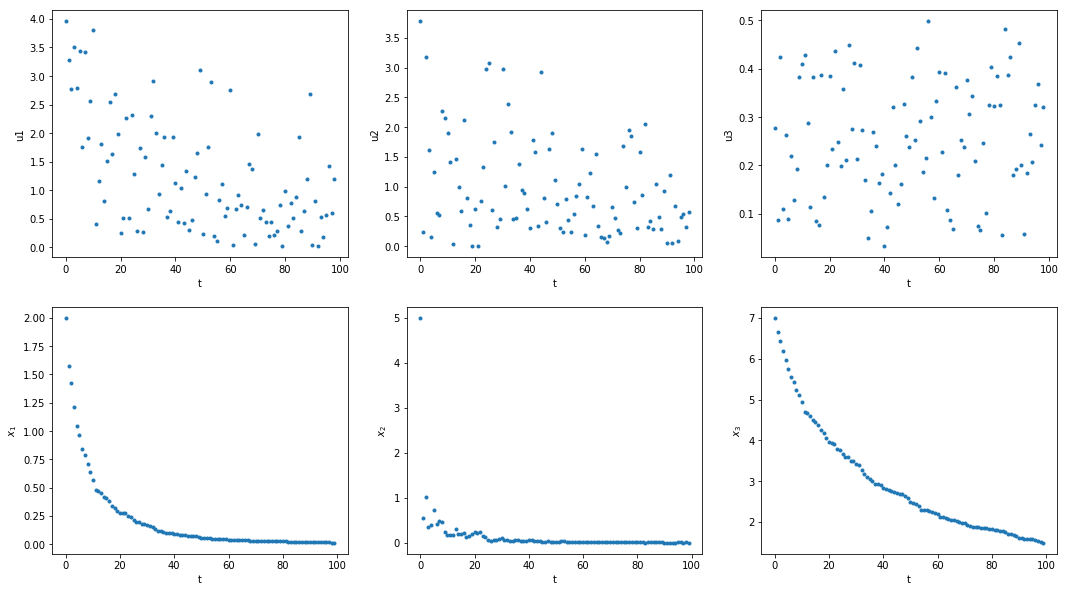

Approximate 341.0462312509568   Presize =  258.3393   Error =  -82.70693125095681
work time :    122.30


In [7]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(100, a.N_step, 5, 5, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

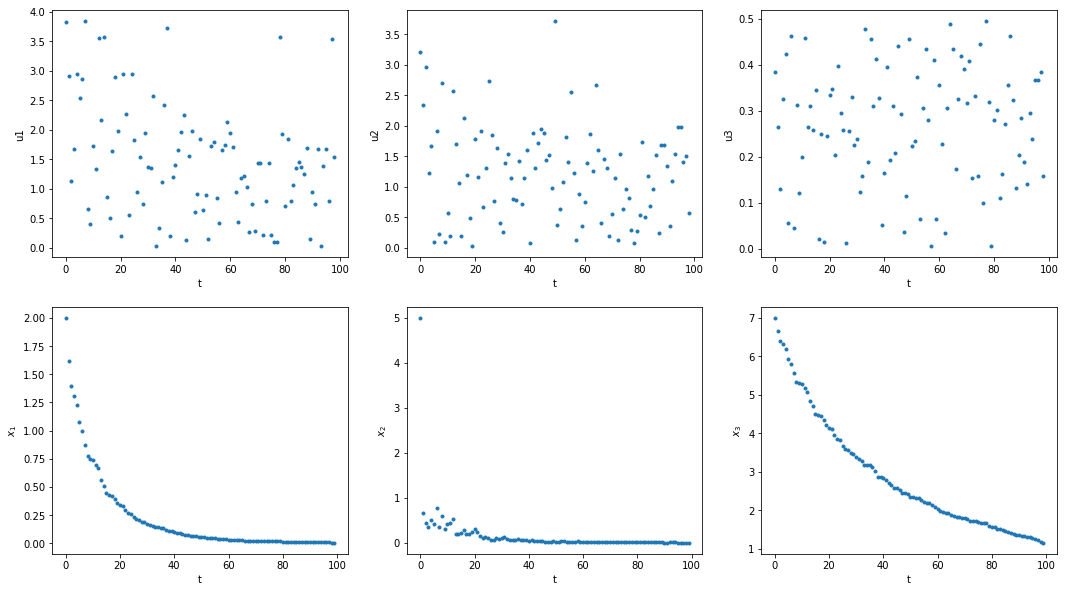

Approximate 369.58109783610206   Presize =  258.3393   Error =  -111.24179783610208
work time :     66.63


In [84]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

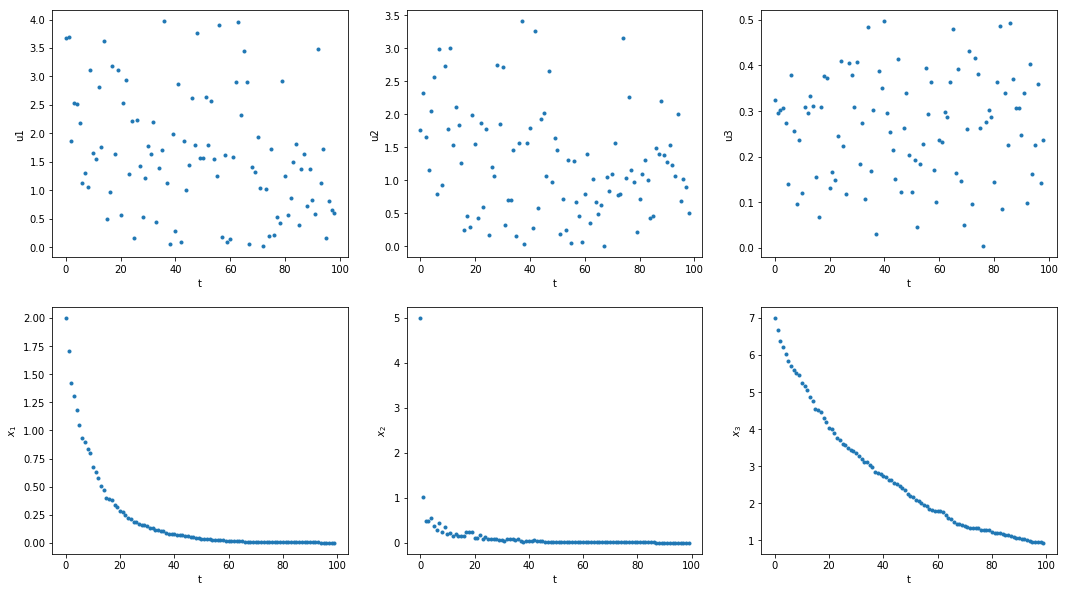

Approximate 372.01419702004216   Presize =  258.3393   Error =  -113.67489702004218
work time :     89.54


In [85]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 10, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

## Подбор параметров

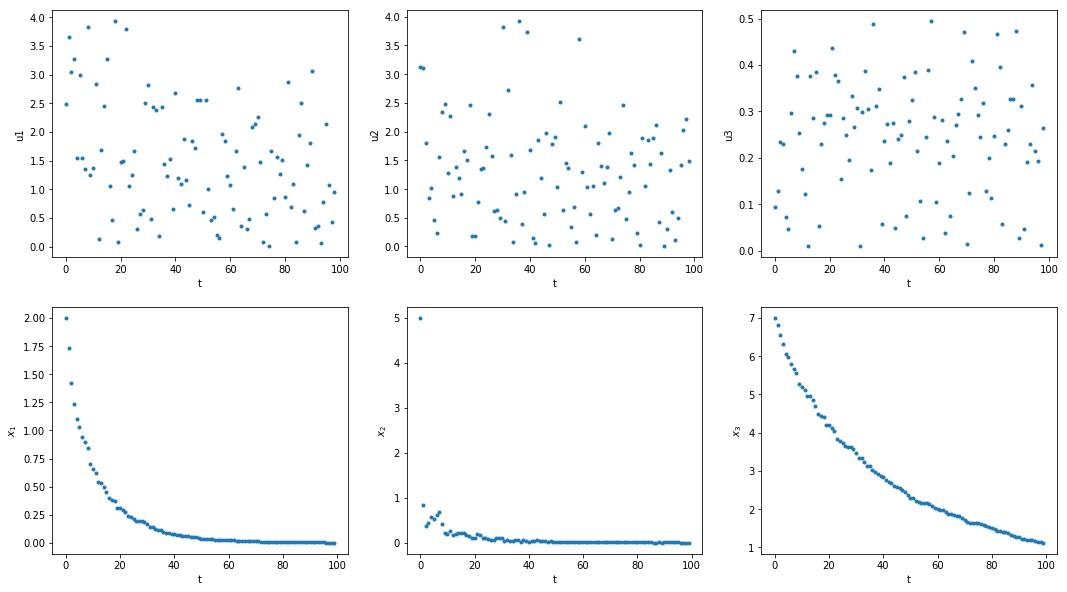

Approximate 368.9839549794373   Presize =  258.3393   Error =  -110.64465497943735
work time :     23.61


In [90]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.1, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

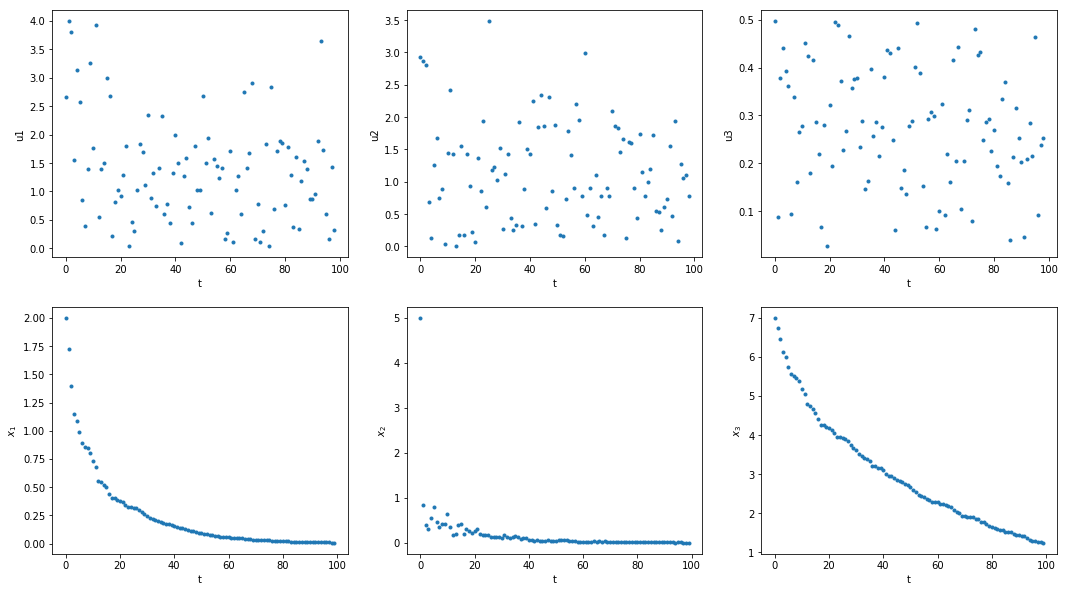

Approximate 368.8527197290089   Presize =  258.3393   Error =  -110.51341972900894
work time :     74.06


In [92]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.9, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

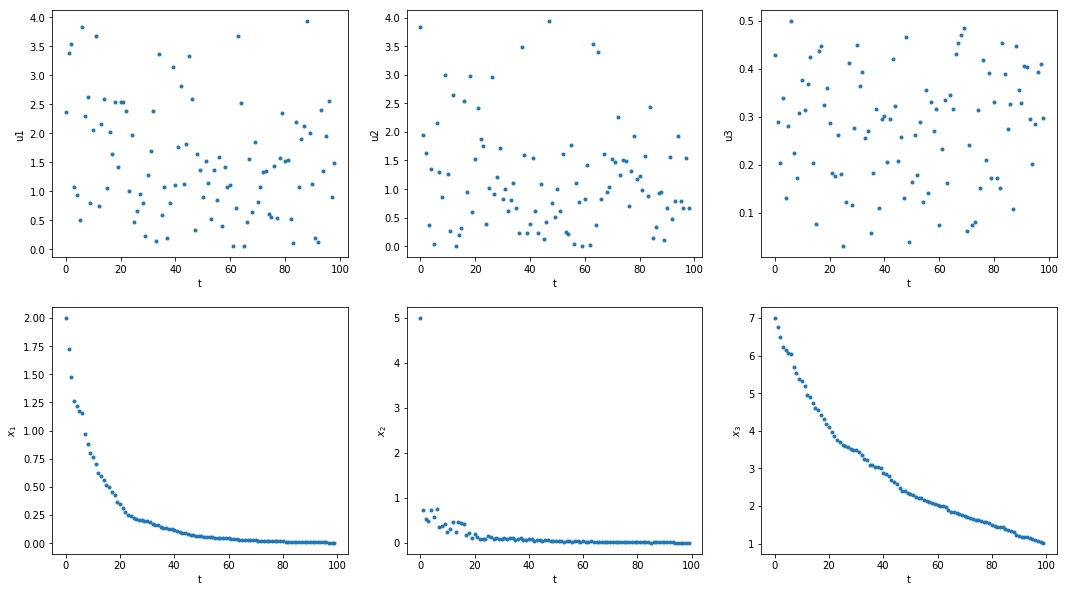

Approximate 385.04730244166876   Presize =  258.3393   Error =  -126.70800244166878
work time :     71.83


In [94]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 0.5, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Увеличим число особей в стае на 5:

# Видно, что при небольшом увеличении числа особей время работы алгоритма возросло в 1.3 раза
# Увеличим количество внешних итераций. Очевидно, время возрастет еще сильнее

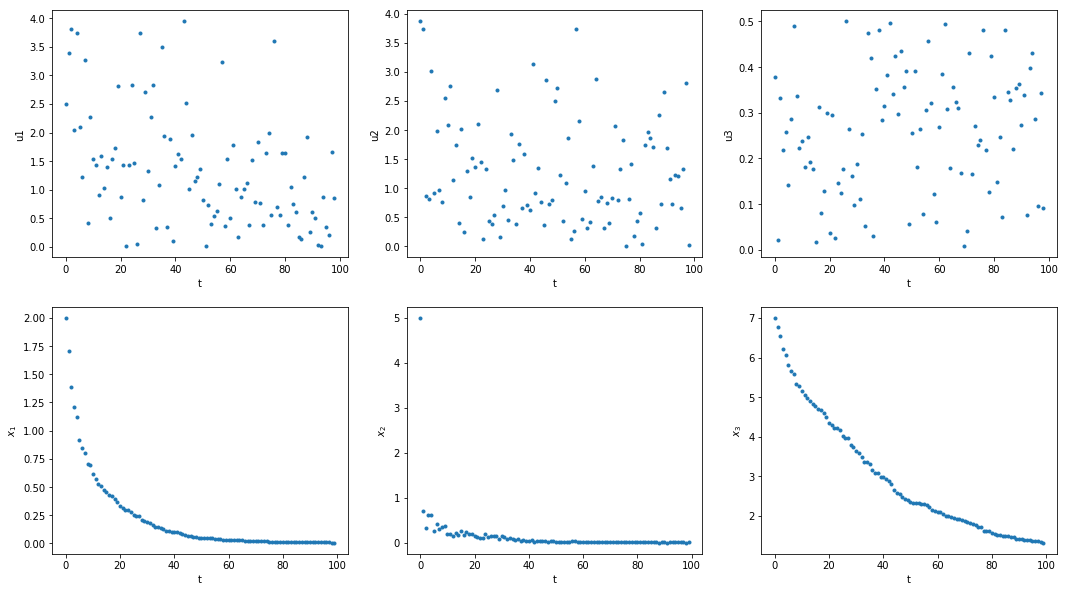

Approximate 368.1092089518231   Presize =  258.3393   Error =  -109.76990895182314
work time :    134.70


In [98]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(20, a.N_step, 15, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Продолжаем увеличивать число особей и итераций циклов

# Результат изменился несильно. Не отчаиваемся, продолжаем анализ.

# Пока что увеличилось только время работы программы. Точноть разве что ухудшилась на десятую.

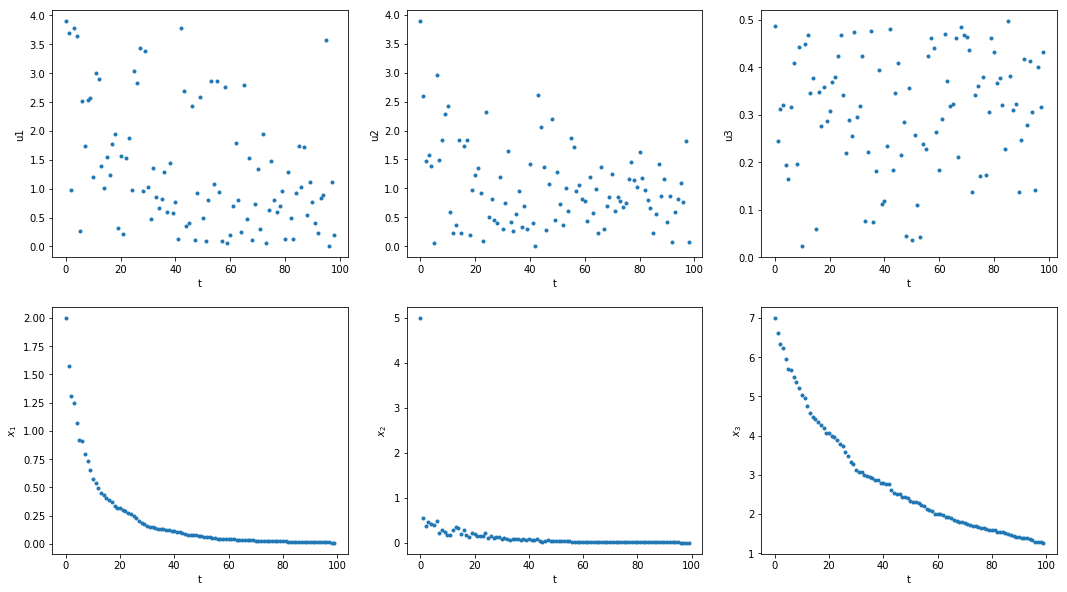

Approximate 354.92513553723614   Presize =  258.3393   Error =  -96.58583553723616
work time :    696.06


In [101]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(40, a.N_step, 25, 15, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Время возрасло в 3 раза, при этом точной улучшилась в 1.3 раза
Увеличим число особей с 40 до 50, число внешних итераций с 15 до 17, уменьшим минимальную область в 10 раз

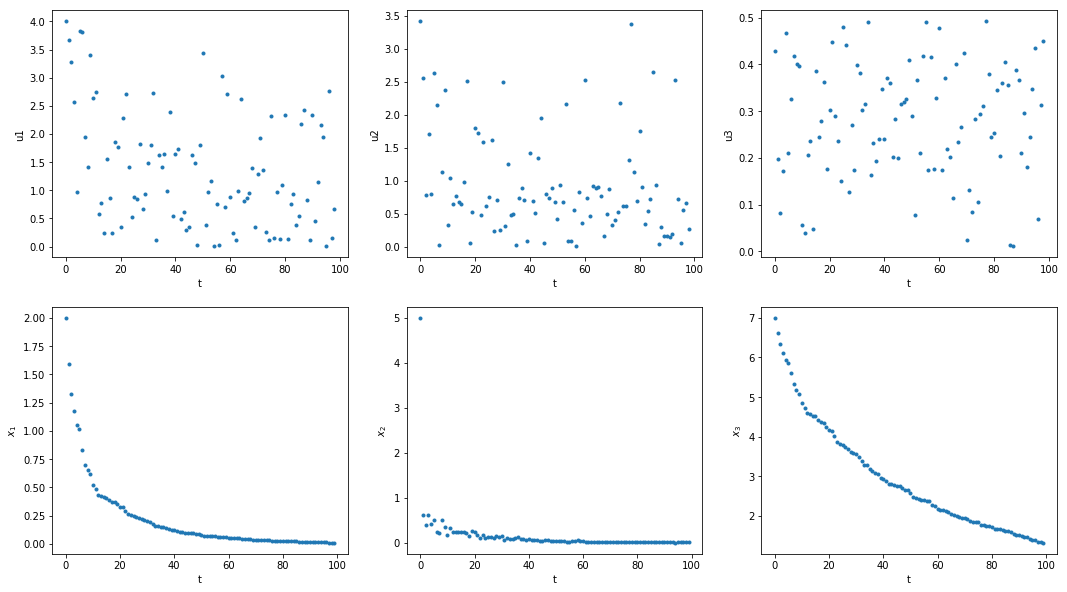

Approximate 349.4265807506715   Presize =  258.3393   Error =  -91.08728075067154
work time :   1190.36


In [103]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(70, a.N_step, 25, 15, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm.work(a)

In [12]:
def print_some(list_):
    for indx in range(algorithm_2.u_dim):
        print(list_.u1[indx])
    print()
    for indx in range(algorithm_2.u_dim):
        print(list_.u2[indx])
    print()
    for indx in range(algorithm_2.u_dim):
        print(list_.u3[indx])

In [108]:
print_some(algorithm.pool[0])

3.9568912881394365
3.2882547515470173
2.7719562980650982
3.5057947942170022
2.7874678810292646
3.4464625583499666
1.7507926581380475
3.4169610053827686
1.912357577388394
2.5680624601369657
3.804359099421228
0.4019892394829929
1.158036541578491
1.8085119324254861
0.8030142156912365
1.5153142267949087
2.5415612498569313
1.6289535442725585
2.6874677085181338
1.9854844635890885
0.24714033460965357
0.5037762928490699
2.267632744227725
0.5107706407026505
2.3108411952538503
1.2790361694003776
0.2905381041550482
1.7333341842685388
0.2670174183925371
1.5723852604701702
0.661526805493333
2.296469553385176
2.917676123616526
1.995829322507629
0.9314250706501751
1.437783880528904
1.9262376940507195
0.5356249594396006
0.6396162656656612
1.9351098648289637
1.1162945931279704
0.43596209613892567
1.0356066316222896
0.4278384166426562
1.3372104548341754
0.2983291469921421
0.46936802451427884
1.2380563891613758
1.6572460800224569
3.1030400745656888
0.22583782023241006
0.9344952688306141
1.761846179133867

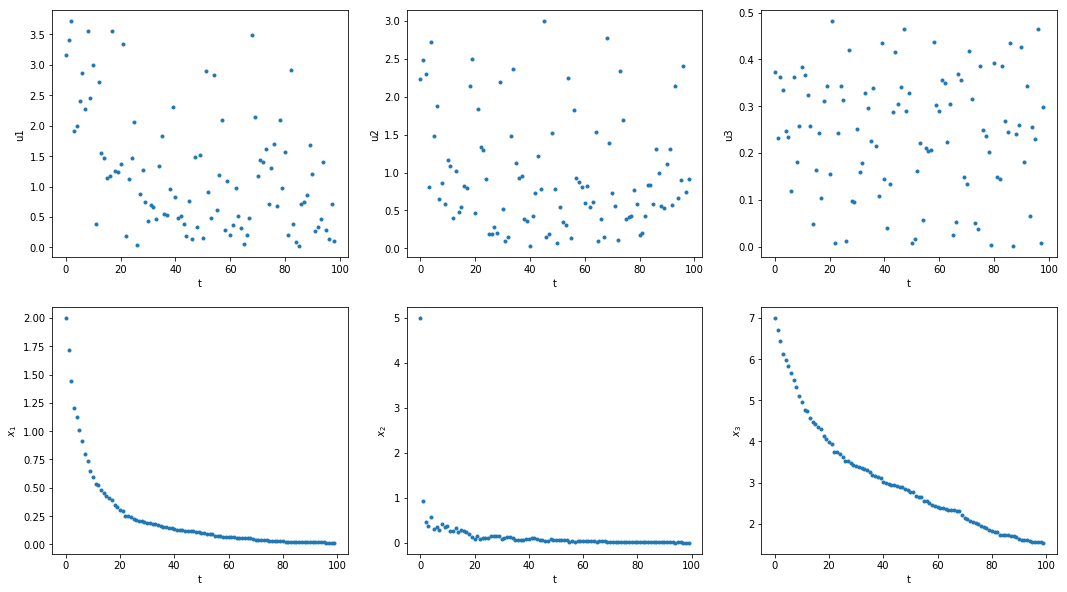

Approximate 342.2888869208966   Presize =  258.3393   Error =  -83.94958692089659
work time :    992.78


In [4]:
a_ = LuusTassonTask(100)
algorithm_ = SparrowSwarm(200, a_.N_step, 10, 10, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_.work(a_)

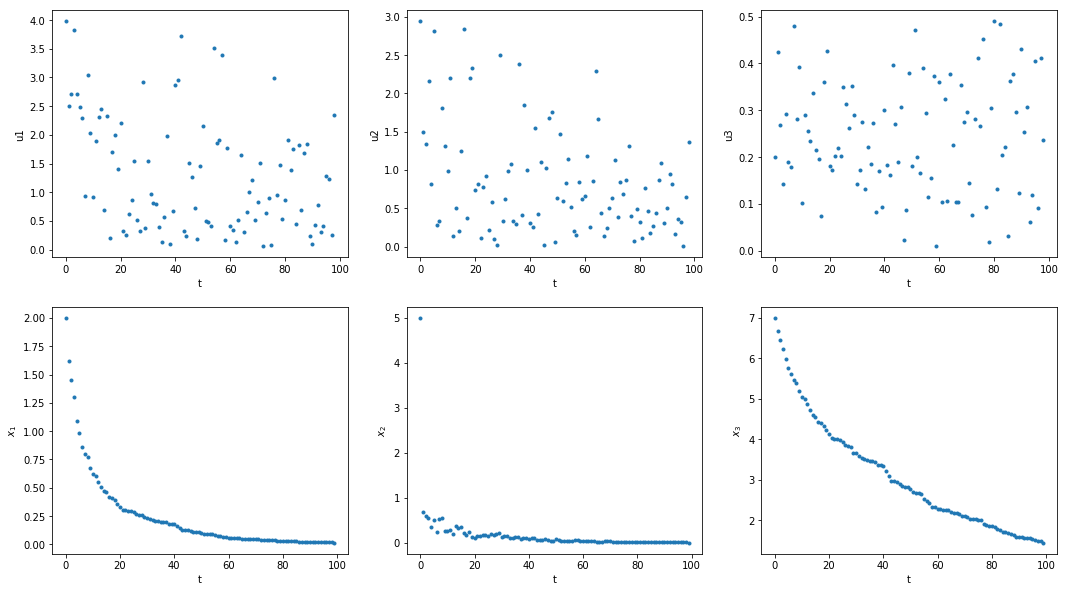

Approximate 346.6690237411263   Presize =  258.3393   Error =  -88.32972374112632
work time :   7610.07


In [6]:
a_1 = LuusTassonTask(100)
algorithm_1 = SparrowSwarm(600, a_1.N_step, 15, 15, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_1.work(a_1)

In [7]:
-88/258*100

-34.10852713178294

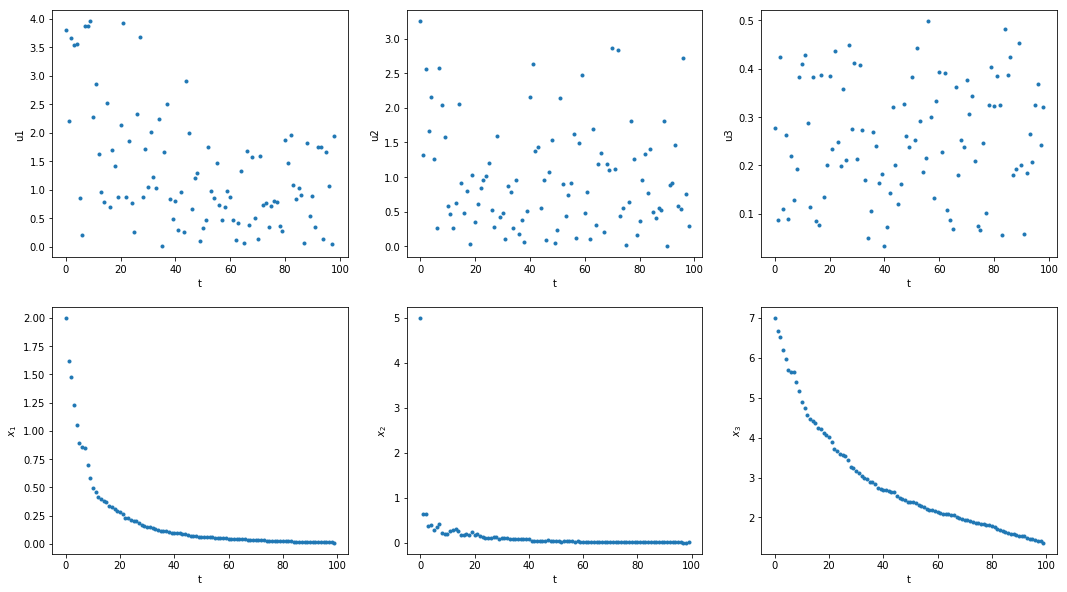

Approximate 336.3245171168502   Presize =  258.3393   Error =  -77.98521711685021
work time :  31900.90


In [9]:
a_2 = LuusTassonTask(100)
algorithm_2 = SparrowSwarm(800, a_2.N_step, 30, 25, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_2.work(a_2)

In [13]:
print_some(algorithm_2.pool[0])

3.8058504266063498
2.206116572223224
3.6679935651337123
3.532263191745238
3.5629210285976103
0.8521072981515101
0.21175278102613748
3.8755803851114274
3.88090359704423
3.9537311544881537
2.2726479463504266
2.8540935357833828
1.634401548074704
0.9664863485045496
0.7859258303119243
2.522458396335979
0.7039587181235858
1.6888194755611852
1.4086039973849314
0.8683270269436467
2.144838770662723
3.927382186079729
0.8643249049972266
1.8596589778677572
0.7700150754523332
0.2619966402531254
2.3261126882635605
3.6747097366602604
0.8656417989358098
1.7075575231134708
1.0490558275904986
2.013441131247565
1.218773158195974
1.031747305454298
2.249589258505557
0.011771436344567787
1.6635668454940662
2.51033972742152
0.8389201377938007
0.48037388036346707
0.7964702300270267
0.29577437946337026
0.957590755475416
0.2518653771979209
2.9140170933360054
1.9904888677673236
0.6640883208677408
1.2037046109508667
1.3025596287092491
0.1008844554198699
0.32009863645219205
0.4638725331523008
1.7430848023263275
0.